In [1]:
from simplegnn.analysis import *

In [2]:
from ase.io import iread 
from simplegnn.painn import Painn

samples=iread('dataset.extxyz',format='extxyz')
atoms=[]

for sample in samples:
    atoms.append(sample)

from sklearn.model_selection import train_test_split
train_atoms, test_atoms = train_test_split(atoms, test_size=0.2, random_state=42)

device='cuda'
model_path='painn_model.pth'
model=Painn(natom_basis=60,n_radial=20, cutoff=5.0,epsilon=1e-7, num_interactions=2)
model.load_state_dict(torch.load(model_path))
model=model.to(device)


In [3]:
parity_plot(model, test_atoms, property_name='energy', batch_size=16, device=device, save_path='painn_energy_parity.png')

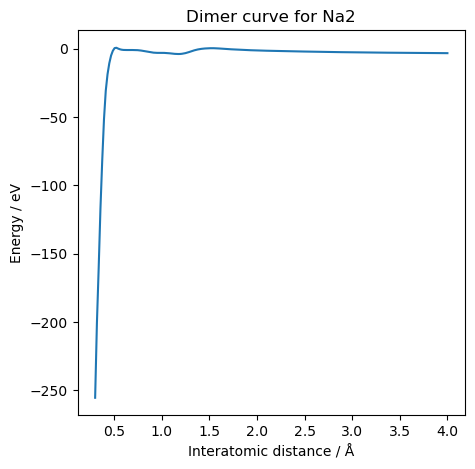

In [4]:
dimer_curve(model, system='Na', rmin=0.3, rmax=4.0, num_points=50, device=device, save_path='painn_dimer_curve.png')

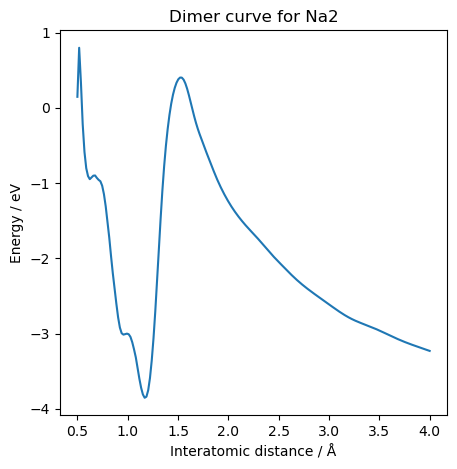

In [7]:
dimer_curve(model, system='Na', rmin=0.5, rmax=4.0, num_points=50, device=device, save_path='painn_dimer_curve.png')

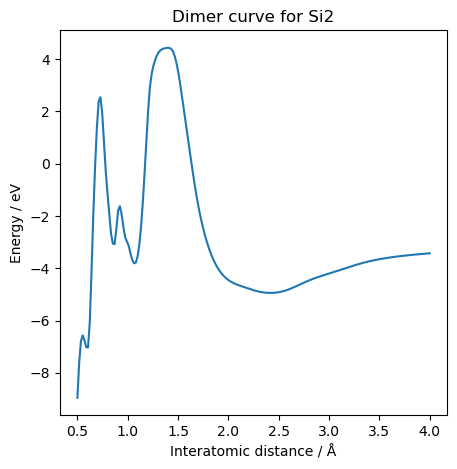

In [8]:
dimer_curve(model, system='Si', rmin=0.5, rmax=4.0, num_points=50, device=device, save_path='painn_dimer_curve.png')

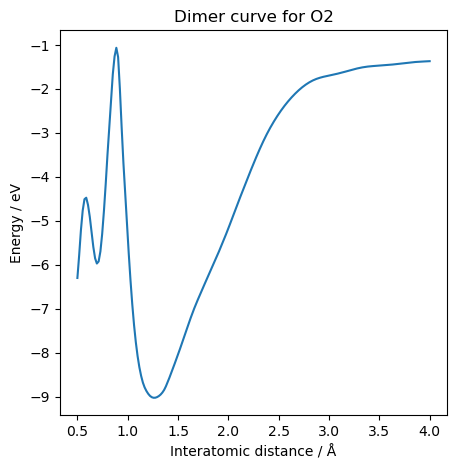

In [9]:
dimer_curve(model, system='O', rmin=0.5, rmax=4.0, num_points=50, device=device, save_path='painn_dimer_curve.png')

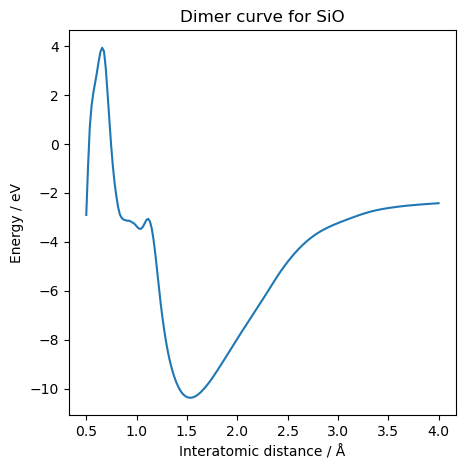

In [10]:
dimer_curve(model, system='SiO', rmin=0.5, rmax=4.0, num_points=50, device=device, save_path='painn_dimer_curve.png')

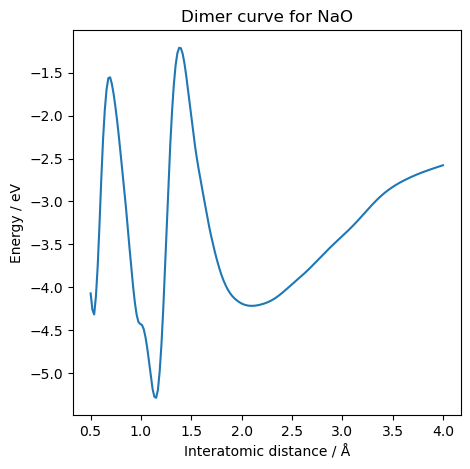

In [11]:
dimer_curve(model, system='NaO', rmin=0.5, rmax=4.0, num_points=50, device=device, save_path='painn_dimer_curve.png')

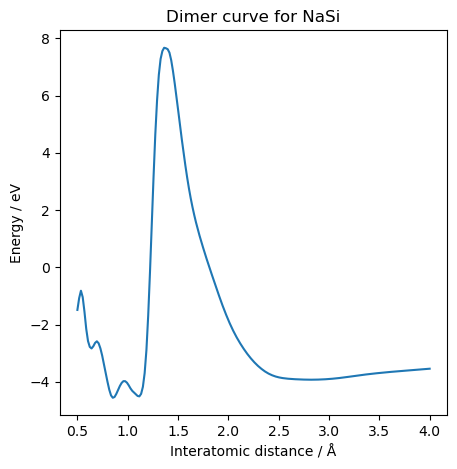

In [12]:
dimer_curve(model, system='NaSi', rmin=0.5, rmax=4.0, num_points=50, device=device, save_path='painn_dimer_curve.png')

やはり近距離のところでの反発力がうまく再現できていない原子対がある。これがRDFで時折変な位置にピークが出てきている理由だろう